# CPSC380: 5_TimeSeries_3_Example

In this notebook, you will learn the followings:
 - Selection, filter by date time
 - Resampling
 - Shifting
 - Windowing

Read more:
 - "Python for Data Analysis" textbook by Wes McKinney textbook (Chapter 11)
 - https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html


In [49]:
import numpy as np
import pandas as pd
import datetime

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn; seaborn.set()

## 1. Downloading Historical Data 

**Important**: Install pandas-datareader and yfinance packages first!

In [50]:
#conda install -c conda-forge pandas-datareader

In [51]:
#conda install -c conda-forge yfinance

In [52]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()

goog = pdr.get_data_yahoo('goog', start='2004-1-1', end='2022-12-23')

[*********************100%***********************]  1 of 1 completed


In [53]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4620 entries, 2004-08-19 to 2022-12-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4620 non-null   float64
 1   High       4620 non-null   float64
 2   Low        4620 non-null   float64
 3   Close      4620 non-null   float64
 4   Adj Close  4620 non-null   float64
 5   Volume     4620 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 252.7 KB


In [54]:
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [55]:
goog.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500
2022-12-20,88.730003,89.779999,88.040001,89.629997,89.629997,21976800
2022-12-21,89.730003,90.915001,88.910004,90.250000,90.250000,20336400
2022-12-22,88.930000,89.180000,86.940002,88.260002,88.260002,23656100


## 2. Indexing/selection

In [56]:
# index slicing
goog['2004-08-19':'2004-08-20']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488


In [57]:
goog['2004']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...
2004-12-27,4.711092,4.814454,4.709846,4.779834,4.779834,245079187
2004-12-28,4.784815,4.820681,4.757418,4.801005,4.801005,166453579
2004-12-29,4.776596,4.819934,4.776596,4.804492,4.804492,107525527


In [58]:
# statistics
goog['2004'].describe()

,Open,High,Low,Close,Adj Close,Volume
count,94.000000,94.000000,94.000000,94.000000,94.000000,9.400000e+01
mean,3.771666,3.853060,3.709911,3.780860,3.780860,3.644370e+08
std,0.820373,0.832932,0.801938,0.812264,0.812264,2.489486e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,8.162079e+07
25%,2.964389,3.015198,2.917626,2.954550,2.954550,1.911297e+08
50%,4.196645,4.244217,4.101501,4.172610,4.172610,2.987215e+08
75%,4.481640,4.544217,4.413831,4.491166,4.491166,4.582964e+08
max,4.962151,5.021179,4.815451,4.921553,4.921553,1.481207e+09


In [59]:
# we will only use close column
goog = goog['Close']
type(goog)

pandas.core.series.Series

In [60]:
goog['2009':'2010']

Date
2009-01-02     8.003003
2009-01-05     8.170624
2009-01-06     8.320313
2009-01-07     8.020188
2009-01-08     8.099391
                ...    
2010-12-27    15.003264
2010-12-28    14.917087
2010-12-29    14.968893
2010-12-30    14.915593
2010-12-31    14.793799
Name: Close, Length: 504, dtype: float64

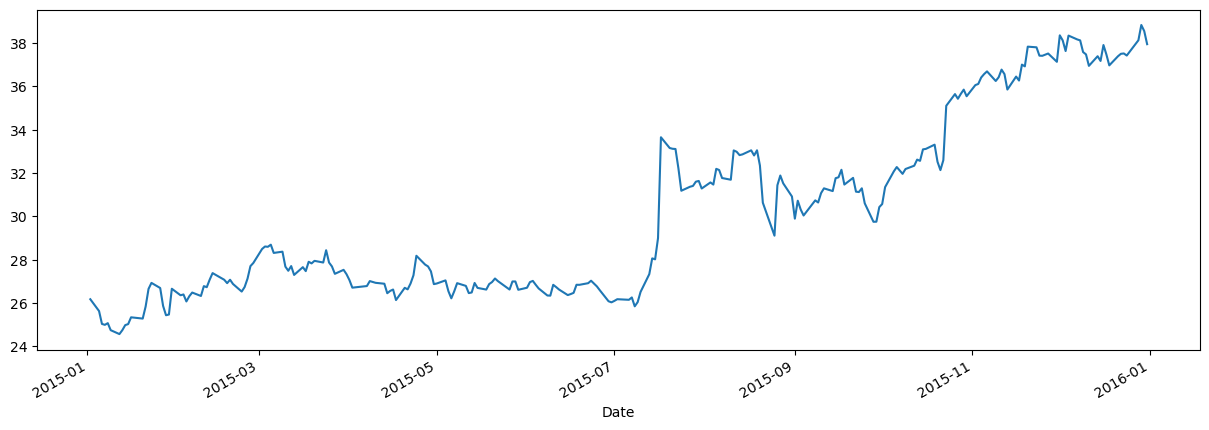

In [61]:
# visualize the historical price
fig = plt.figure(figsize=(15,5))
goog['2015'].plot();

## 3. Resampling and converting frequencies

One common need for time series data is resampling at a higher or lower frequency.
- ``resample()`` is fundamentally a *data aggregation*
- ``asfreq()`` is fundamentally a *data selection*.

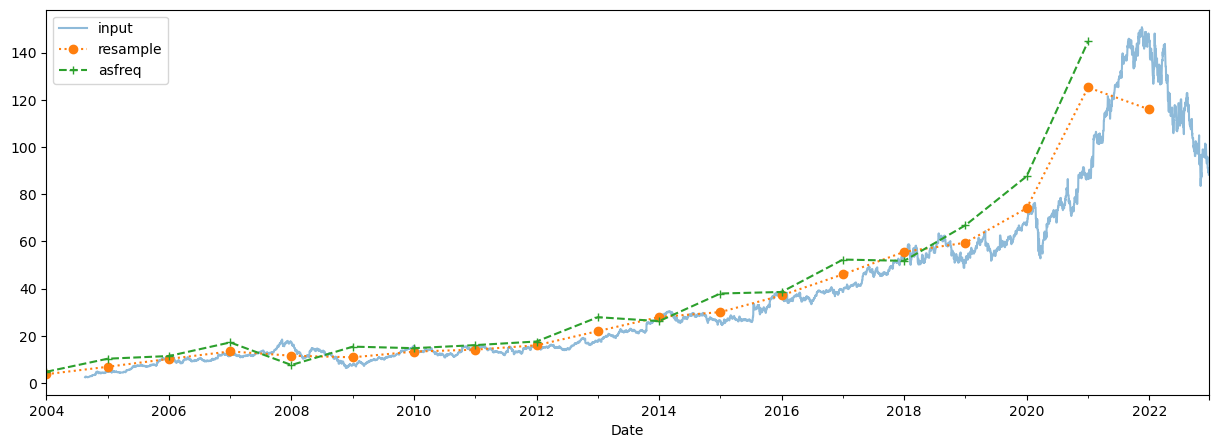

In [70]:
fig = plt.figure(figsize=(15,5))

goog.plot(alpha=0.5, style='-')
goog.resample('A').mean().plot(style=':', marker='o')
goog.asfreq('A').plot(style='--', marker='+');
plt.legend(['input', 'resample', 'asfreq'],
            loc='upper left');

Notice the difference: at each point, ``resample`` reports the *average of the previous year*, while ``asfreq`` reports the *value at the end of the year*.

For up-sampling, ``resample()`` and ``asfreq()`` are largely equivalent, though resample has many more options available.
In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values.
Just as with the ``pd.fillna()`` function discussed previously, ``asfreq()`` accepts a ``method`` argument to specify how values are imputed.
Here, we will resample the business day data at a daily frequency (i.e., including weekends):

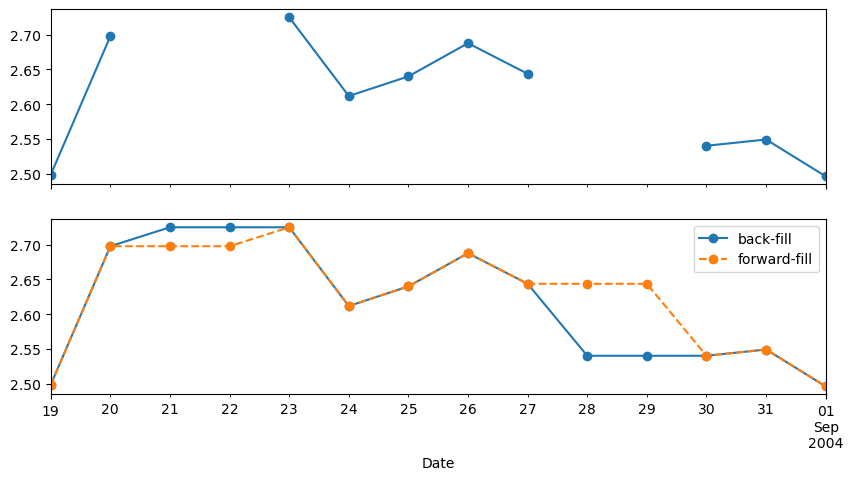

In [63]:
fig, ax = plt.subplots(2, sharex=True,figsize=(10,5))
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

## 4. Time-shifts

Another common time series-specific operation is shifting of data in time.
Pandas has two closely related methods for computing this: ``shift()`` and ``tshift()``
In short, the difference between them is that ``shift()`` *shifts the data*, while ``tshift()`` *shifts the index*.
In both cases, the shift is specified in multiples of the frequency.

Here we will both ``shift()`` and ``tshift()`` by 900 days; 

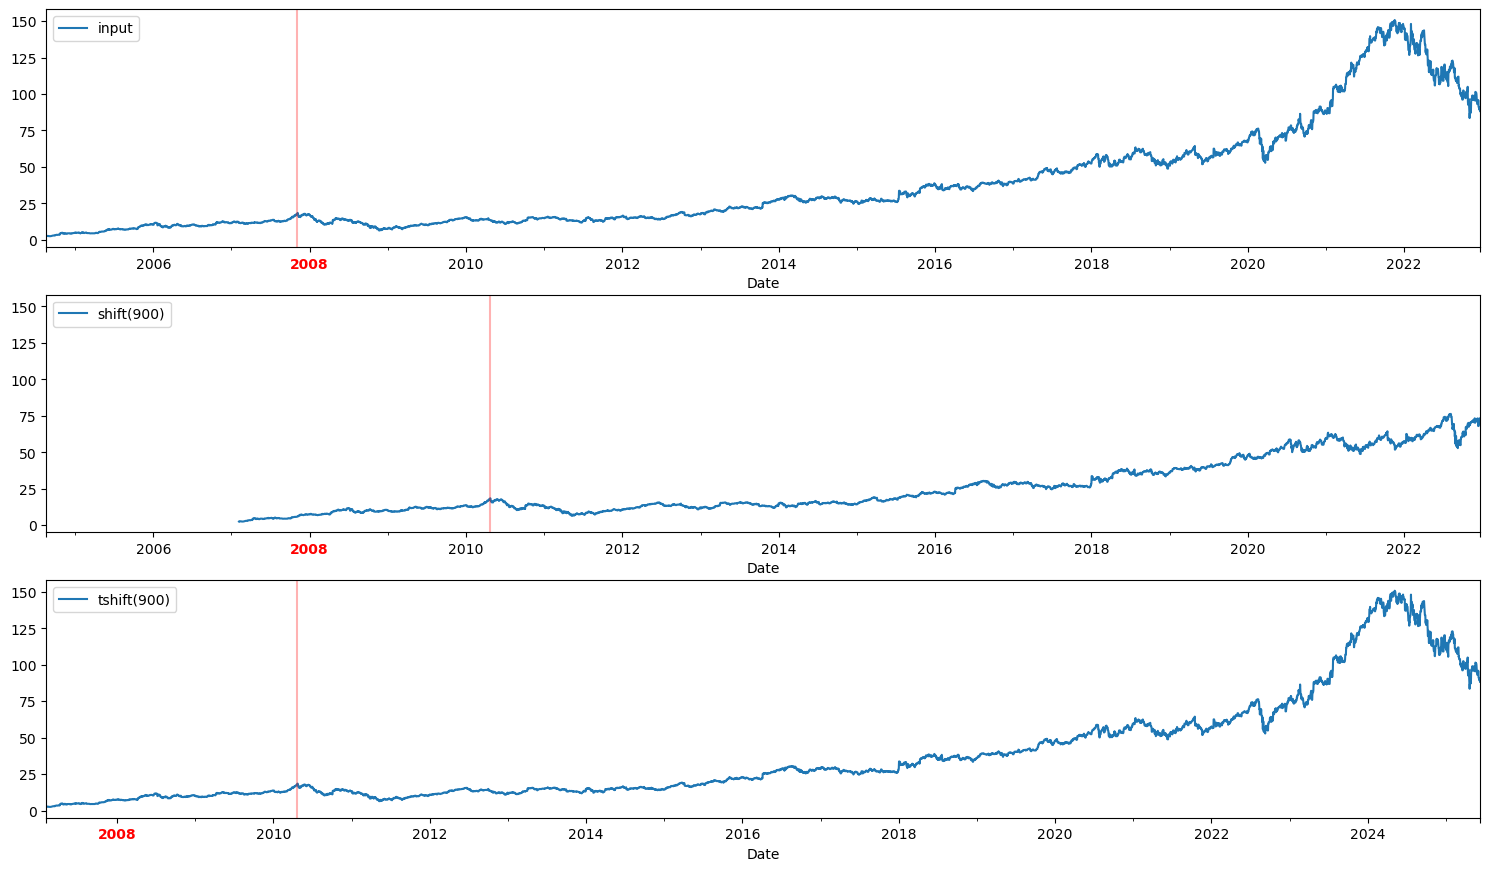

In [64]:
fig, ax = plt.subplots(3, sharey=True)
fig.set_size_inches(18.5, 10.5)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
#print(goog[:5])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

We see here that ``shift(900)`` shifts the *data* by 900 days, pushing some of it off the end of the graph (and leaving NA values at the other end), while ``tshift(900)`` shifts the *index values* by 900 days.



### Shift Application: 

Using shift for computing differences over time

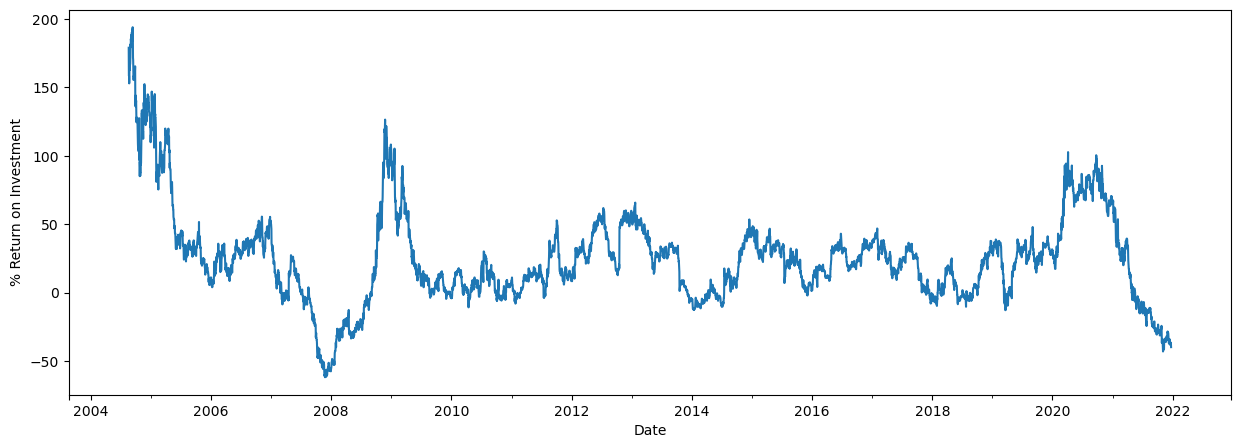

In [76]:
fig = plt.figure(figsize=(15,5))

ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');
fig.savefig('ROI.png')

## 5. Rolling windows

<AxesSubplot:xlabel='Date'>

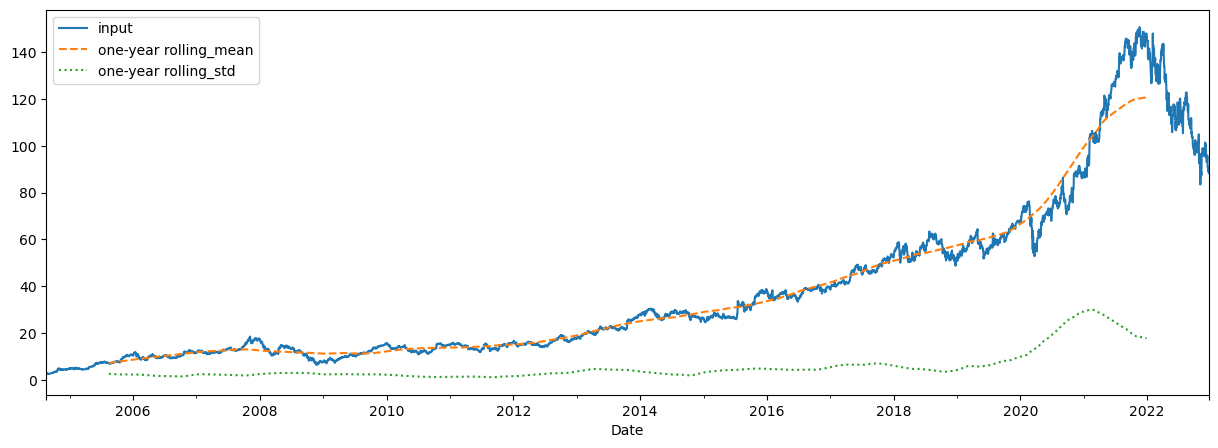

In [66]:
rolling = goog.rolling(720, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})

fig,ax = plt.subplots(figsize=(15,5))
data.plot(style=['-', '--', ':'], ax=ax)
#ax.lines[0].set_alpha(0.3)